# Quantum repetition code for bit-flips

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

We are now in a position to introduce quantum codes. Our goal is to understand how a set of qubits transmitted through a noisy channel can be protected from any errors they experience. The process is similar to classical codes in that we will take the state of $k$ qubits and encode it into the state of $n$ qubits. However, our task will be complicated by the fact that the operations on qubits are not just bit-flips but any possible interaction with the environment, such as phase-flips or more general rotations. Fortunately, we will discover that this possibility of infinite types of errors will not be too large a hindrance and we can construct good codes.

## Setup
Alice has a quantum transmission channel to Bob that is noisy. In general she intends to transmit a $k$-qubit state to Bob. During transmission, the quantum state can experience an error $E$.

![Quantum error model](../../images/noquantumerrorcorrection.png)

Let's assume for starters that the noisy channel applies, with probability $p$, the quantum bit-flip operator $X$ to each qubits that pass through it. We will discuss channels with different errors later on.

Suppose for a moment that $k=1$ for simplicity. Alice wants to transmit to Bob the one-qubit state $\ket{\psi} = \alpha\ket{0} + \beta\ket{1}$. If she sends the state as is, there is a probability $(1-p)$ that Bob receives the state $\ket{\psi}$ and probability $p$ that Bob receives the state $\ket{\tilde\psi} = X\ket{\psi} = \beta\ket{0} + \alpha\ket{1}$. 

Bob does not know whether an error occurred or not. So he is quite unclear on what state Alice meant to send. To magnify the chances of successful communication, Alice and Bob should employ a quantum error-correcting code. At the abstract level, the process will look like the following.

![Quantum error correction model](../../images/quantumerrorcorrectionmodel.png)

Let us study the different parts of this process, using the quantum repetition code as our working example.

## Encoding
In the quantum version of the repetition code, Alice takes the unencoded qubit and encodes it into the state of three qubits in a repetitive manner. This is best seen by first noting the transformation on the basis states,
\begin{align}
  \ket{0} \to \ket{\bar{0}} = \ket{000}, \\
  \ket{1} \to \ket{\bar{1}} = \ket{111}.
\end{align}
From this, we can determine the qubit in state $\ket{\psi}$ is encoded as
\begin{equation}
  \ket{\psi}\ket{00} = (\alpha\ket{0} + \beta\ket{1})\ket{00} \to \ket{\bar\psi} = \alpha\ket{000} + \beta\ket{111},
\end{equation}
where the $\ket{00}$ are ancilla qubits.

We will call the original qubit the *unencoded logical qubit*, the three qubits the *data qubits*, and their combined state $\ket{\bar\psi}$ the *encoded logical qubit*.

The encoding transformation can be done using the following quantum circuit, which takes the unencoded logical qubit and two ancillas in state $\ket{\psi}\ket{00}$, to the encoded logical qubit in state $\ket{\bar\psi}$.

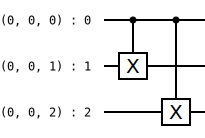

In [1]:
import stac
enc_circ = stac.Circuit.simple(3)
enc_circ.append('CX', 0, 1)
enc_circ.append('CX', 0, 2)
enc_circ.draw()

#### Task 1 (On paper)
Determine the encoding of the $\ket{+}$ state and $\ket{-}$ state.

#### Task 2 (On paper)
Determine logical gate operations $\bar{X}$ and $\bar{Z}$ for the three-qubit repetition code. These are operations that act on the logical basis $\set{\ket{\bar{0}}, \ket{\bar{1}}}$, in the normal way, i.e.
  \begin{align}
    \bar{X}\ket{\bar{0}} &= \ket{\bar{1}}, \quad \bar{X}\ket{\bar{1}} = \ket{\bar{0}}, \\
    \bar{Z}\ket{\bar{0}} &= \ket{\bar{0}}, \quad \bar{Z}\ket{\bar{1}} = -\ket{\bar{1}}.
  \end{align}
  They can be constructed by some combination of operations on the three data qubits. You will discover that there are possibly multiple ways of doing so.

### Errors on the state
Alice sends the three data qubits through the noisy channel. Each of them will have probability $p$ of being flipped. If the second qubit is flipped, then Bob receives the state $X_2\ket{\bar\psi} = \ket{\tilde\psi} = \alpha\ket{010} + \beta\ket{101}$. In total there, are eight possiblities for the error, with the probabilities similar to the classical case.

|  Error       | Probability | 
|:------------:|:-----------:|
|  $I$         | $(1-p)^3$   |
|  $X_0$       | $p(1-p)^2$  |
|  $X_1$       | $p(1-p)^2$  |
|  $X_2$       | $p(1-p)^2$  |
|  $X_0X_1$    | $?$         |
|  $X_0X_2$    | $?$         |
|  $X_1X_2$    | $?$         |
|  $X_0X_1X_2$ | $p^3$       |

*Question:* Fill the ? in the table above.

#### Task 3 (On paper)
Determine the impact of each error on the input basis states.

Let input state be $\ket{000}$

|  Error       | Output state | 
|:------------:|:------------:|
|  $I$         | $\ket{000}$  |
|  $X_0$       | $\ket{100}$  |
|  $X_1$       | $?$          |
|  $X_2$       | $?$          |
|  $X_0X_1$    | $?$          |
|  $X_0X_2$    | $?$          |
|  $X_1X_2$    | $?$          |
|  $X_0X_1X_2$ | $?$          |

Let input state be $\ket{111}$

|  Error       | Output state | 
|:------------:|:------------:|
|  $I$         | $\ket{111}$  |
|  $X_0$       | $\ket{011}$  |
|  $X_1$       | $?$          |
|  $X_2$       | $?$          |
|  $X_0X_1$    | $?$          |
|  $X_0X_2$    | $?$          |
|  $X_1X_2$    | $?$          |
|  $X_0X_1X_2$ | $?$          |

Do different errors result in the same output state?

As in the classical case, the code can only correctly recover the state if only zero or one error occurs and fails otherwise. Similarly, as in the classical case, if $p$ is sufficiently small, then two or three errors are very unlikely to occur.

## Decoding

There are three parts to decoding

1. Identifying which error has occurred.
2. Correcting the corrupted codeword.
3. Turning the corrected codeword back into message (this part is also called decoding).

### Detecting the error
Assuming that only errors from the set $\st{E} = \set{I,X_0,X_1,X_2}$ occur, Bob has to (a) identify which of these errors has occurred and (b) then correct for it. His task is more difficult than in the classical case because he can't measure the received state as this would destroy the superposition, and he would gain very little information about $\alpha$ and $\beta$ which is what Alice is really trying to transmit to Bob.

Instead the correct strategy for Bob to pursue is to do a partial measurement that only determines whether one of the qubits is different from the other two. This is the replacement of the majority voting algorithm in the classical case, but quite similar.  This type of measurement does not probe the value of $\alpha$ or $\beta$ and therefore the superposition is maintained. Specifically Bob compares the value of the first two qubits, and compares the value of the last two qubits. If there is a difference, then he will know which error occurred. The following circuit accomplishes this task, in which two ancilla qubits are required.

> The ancilla qubits used for detecting errors are called *syndrome* qubits.

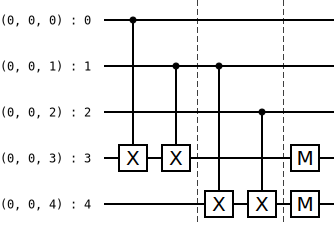

In [2]:
synd_circ = stac.Circuit.simple(5)
synd_circ.append('CX', 0, 3)
synd_circ.append('CX', 1, 3)
synd_circ.append('TICK')
synd_circ.append('CX', 1, 4)
synd_circ.append('CX', 2, 4)
synd_circ.append('TICK')
synd_circ.append('M', 3)
synd_circ.append('M', 4)
synd_circ.draw()

This circuit has three parts. In the first part, the values of the first and second data qubits are added to the first syndrome qubit. This is done by $CX$ gates, which if you recall, in the computational basis, add the value of the control qubit to the target qubit,
\begin{equation}
 CX_{01}\ket{a}\ket{b} = \ket{a}\ket{a \oplus b}.
\end{equation}

If the first two data qubits have the same value, then either none of the $CX$ gates will trigger or both will, and so the value of the syndrome qubit will not change. This can be seen from the calculation,
\begin{align}
  CX_{03}CX_{13} (\alpha\ket{000} + \beta\ket{111})\ket{00} &= \alpha CX_{03}CX_{13}\ket{000}\ket{00} + \beta CX_{03}CX_{13}\ket{111}\ket{00}, \\
                 &= \alpha \ket{000}\ket{00} + \beta \ket{111}\ket{0+1+1,0},                        \\
                 &= \alpha \ket{000}\ket{00} + \beta \ket{111}\ket{00}.
\end{align}
Here, the $CX$ gates don't trigger for the first term in the superposition, but do trigger for the second term, which we have made explicit.

If the first two data qubits are different, then only one of the $CX$ gates will trigger. For instance,
\begin{align}
  CX_{14}CX_{24}(\alpha\ket{010} + \beta\ket{101})\ket{00} &= \alpha CX_{14}CX_{24}\ket{010}\ket{00} + \beta CX_{14}CX_{24}\ket{101}\ket{00}, \\
                &= \alpha \ket{010}\ket{0+1,0} + \beta \ket{101}\ket{0+1,0}, \\
                &= \alpha \ket{010}\ket{10} + \beta \ket{101}\ket{10}.
\end{align}
Hence, the value of the syndrome qubit flipped.

The same story plays out for the second part of the circuit except for the second and third data qubits. Subsequently, the two syndrome qubits are measured. The measurement results are called the *syndrome*, and they contain information, which can be used to infer which error has occurred. This is summarized in the following table.

|  Syndrome | Inferred error |
|:---------:|:--------------:|
|  $00$     | $I$            | 
|  $01$     | $X_2$          |
|  $10$     | $X_0$          |
|  $11$     | $X_1$          |

We say inferred error, because this is the error Bob assumes, but there is small chance of a two or three qubit error, so there is difference between the actual error and the inferred error.

*Question:* Above, we have shown how row 1 and row 3 of the table are obtained. Work out the other two rows by hand.

#### Test the procedure
Use the following circuit to test this process of inferring the correct error

In [3]:
circ = stac.Circuit.simple(5)

# set message to |1> by uncommenting
# circ.append('X', 0)

# encode the state
circ.append('CX', 0, 1)
circ.append('CX', 0, 2)

# apply error to 0,1 or 2
circ.append('X', 0)

# do syndrome measurements
circ.append('CX', 0, 3)
circ.append('CX', 1, 3)
circ.append('TICK')
circ.append('CX', 1, 4)
circ.append('CX', 2, 4)
circ.append('TICK')
circ.append('M', 3)
circ.append('M', 4)

# sample the measurements
# should be the syndrome
circ.sample()


[1 0]


### Correcting the error

Once, Bob has inferred an error, he can fix the corrupted codeword by applying the inverse of the error. In this case, the error operators are self-inverse, so he just has to apply them again to fix the corrupted codeword, eg. if he thinks error $X_1$ has occurred, he applied $X_1$ to the corrupted state to fix it.

### Decoding

Finally, Bob can undo the encoding operation to recover the one-qubit state Alice meant to send. Since, the encoding operation was self-inverse, Bob just has to pass $\ket{\bar\psi}$ through it to recover $\ket{\psi}$.

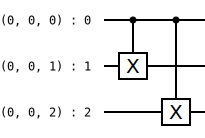

In [4]:
dec_circ = stac.Circuit.simple(3)
dec_circ.append('CX', 0, 1)
dec_circ.append('CX', 0, 2)
dec_circ.draw()

### A note on probability of success
We don't have to repeat our analysis of the probability of success as it is exactly the same as in the classical case. If $p$ is less than half, then using the quantum repetition code will be beneficial.

*Question:* Consider the 5-qubit repetition code, in which the coding operates in a similar fashion as the 3-qubit one we have discussed, but with five qubits instead of three. Can this larger code possibly correct errors in which two qubits are flipped? 

## A linear algebraic analysis of the quantum repetition code
One way of understanding why the code works is by understanding the vector spaces we have dealt with above. 

First, there was the $2$-dimensional Hilbert space of the unencoded logical qubit. This was mapped to a $2$-dimensional subspace of the $2^3$-dimensional Hilbert space of the three data qubits, the latter of which is called the *codespace*, and the former the *quantum code*. Errors move the encoded state into other $2$-dimensional subspaces of the codespace. For instance, the quantum code had a basis $\set{\ket{000},\ket{111}}$. The error $X_1$ moved the state to a subspace with basis $\set{\ket{010},\ket{101}}$. We can tabulate all these movements as follows.

| Error | Subspace basis              |
|:-----:|:---------------------------:|
| $I$   | $\set{\ket{000},\ket{111}}$ |
| $X_0$ | $\set{\ket{100},\ket{011}}$ |
| $X_1$ | $\set{\ket{010},\ket{101}}$ |
| $X_2$ | $\set{\ket{001},\ket{110}}$ |

From this analysis we can see why the code works to correct bit-flip errors. Each error doesn't fundamentally destroy the state, it only moves it to a different subspace. The process of error-detection is to determine which subspace we are in, which does not distort the actual state. The process of error-correction moves us back to the original quantum code subspace. We will use this notion of subspaces again when we formally define quantum error-correction.

*Question:* Recall that a vector subspace is characterized by a projector $\Pi = \sum_i \ket{\psi_i}\bra{\psi_i}$, where $\set{\ket{\psi_i}}_i$ is a basis for the subspace. Show that $\Pi^2 = \Pi$. 

*Question:* Determine the projector onto the code for the three-qubit code.

### Correcting $X$ rotation errors
The code we have created can correct errors besides simple $X$ errors. The unitary,
\begin{equation}
  R_x^{(i)}(\theta) = \cos\theta I - \iu \sin\theta X^{(i)},
\end{equation}
is the rotation about the $X$ axis on the Bloch sphere for the $i$-th qubit. Suppose, the encoded state $\ket{\bar\psi}$ is effected by this unitary during its passage through the communication channel between Alice and Bob. We now show that the error detection and correction procedures we have described above deal with this error, and Bob has to do nothing extra to correct for such an error.

To see this we calculate the corrupted codeword state,
\begin{equation}
  \ket{\tilde\psi} = R_x^{(i)}(\theta)\ket{\bar\psi} = \cos\theta\ket{\bar\psi} - \iu \sin\theta X^{(i)}\ket{\bar\psi}.
\end{equation}
When, we run this state through the error-detection circuit (in which we append two ancillas to the state), we obtain before the measurement step, the state
\begin{align}
  (\cos\theta\ket{\bar\psi} - \iu \sin\theta X^{(i)}\ket{\bar\psi})\ket{00} \to \cos\theta\ket{\bar\psi}\ket{00} - \iu \sin\theta X^{(i)}\ket{\bar\psi}\ket{s},
\end{align}
where $\ket{s}$ is the syndrome associated with $X^{(i)}$. When we measure the ancilla, either the measurement result is $00$ (with probability $|\cos\theta|^2$) and the corrupted codeword state collapses to $\ket{\bar\psi}$, or the measurement result is $s$ (with probability $|\sin\theta|^2$) and the corrupted codeword state collapses to $X^{(i)}\ket{\bar\psi}$. In either case, the subsequent error-correction procedure will correct the state.

What we see here is that linearity of quantum mechanics and the collapse mechanism on measurement allows us to correct errors which are a linear combination of errors in $E$. This is an incredibly powerful result, and we will prove it more generally later on.

### Phase-flip errors
Quantum bit-flip errors are only one kind of errors. Quantum systems in interacting with the environment can suffer from other types of error. One such possibility is phase-flip errors, i.e. where the qubits can be acted upon by the $Z$ operator. This code fails to identify phase-flip errors and therefore cannot correct them either, which is why we deliberately excluded such errors from our noise channels.

To see this note that the action of, say, $Z_1$ on the logical state is
\begin{equation}
  Z_1\ket{\bar\psi} = Z_1(\alpha\ket{000} + \beta\ket{111}) = \alpha\ket{000} - \beta\ket{111}.
\end{equation}
This state is identical to a different state Alice might have sent ($\alpha\ket{0} - \beta\ket{1}$), so there is no way that Bob can determine that an error has occurred. In the subspace picture discussed above single-qubit $Z$ errors keep the state within the code. This makes it impossible, both here and generally, for the error to be detected. A well-designed code ensures that every possible error moves the state out of the code and into some other subspace of the codespace.

## A classification of errors by detectability and correctability (optional)
We have discovered that not every error $E$ that could occur is detectable or correctable. Let us break this down into a set of categories.

1. $E$ distorts $\ket{\bar\psi}$ in a way that the effects of $E$ can be reversed. For the bit-flip repetition code $E=X_0$ is an example. And generally all single-qubit bit-flip $E$s are corrected by the code.

2. $E$ distorts $\ket{\bar\psi}$ in a way that the effects are not corrected. There are two varieties of this. 

   a. If $E=X_0X_1X_2$, then $\ket{000}$ is taken to $\ket{111}$ and vice versa - i.e. the error distorts one codeword into another codeword. Another example is the single or triple qubit phase-flips. This means that the error-detection procedure thinks no error has occurred.

   b. If $E=X_0X_1$, then the error-detection process thinks that $E=X_2$ has occurred. A similar wrong inference of the error happens for any other two-qubit bit-flip error. Subsequently error-correction procedure does the wrong correction.
   
3. $E$ does not distort $\ket{\bar\psi}$ at all, i.e. $E\ket{\bar\psi} = \ket{\bar\psi}$. For instance, $E=Z_0Z_1$ does not effect the encoded state at all. Therefore, the code is immune to such $E$s.

The last category is the most surprising one of all that does not occur in classical error-correction at all, because there are no phase-flips in the classical case.

Summarizing, suppose Alice sends the message $\ket{\psi}$ to Bob. Then Bob's estimated message depending on the error that occurs is given in the table below.

|      Error    | Estimated message $\ket{\hat\psi}$ |
|:-------------:|:----------------:|
| $X_i$         | $\ket{\psi}$     |
| $X_iX_j$      | $X\ket{\psi}$    |
| $X_0X_1X_2$   | $X\ket{\psi}$    |
| $Z_i$         | $Z\ket{\psi}$    |
| $Z_iZ_j$      | $\ket{\psi}$     |
| $Z_0Z_1Z_2$   | $Z\ket{\psi}$    |